In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import plotly.express as px
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 400)
pd.set_option("display.max_colwidth", None) # -1 for all of it

In [4]:
dfo = pd.read_feather("data/open_discourse_1819.feather")
dfo["speech_content"] = dfo["speech_content"].str.normalize('NFKD')
dfo.sort_index(inplace=True)

In [6]:
dfg = pd.read_feather("data/germaparl.feather")
dfg["last_name"] = dfg.name.str.split().str[-1]
dfg["speech"] = dfg["speech"].str.normalize('NFKD')
#dfg.head(1)

In [18]:
# calculate difference of speeches in each session
dfoo = dfo[dfo["electoral_term"] == 18]
dfgg = dfg[dfg["electoral_term"] == 18]
x = dfgg.value_counts("session", sort=False)
y = dfoo.value_counts("session", sort=False)
x18 = x-y
dfoo = dfo[dfo["electoral_term"] == 19]
dfgg = dfg[dfg["electoral_term"] == 19]
x = dfgg.value_counts("session", sort=False)
y = dfoo.value_counts("session", sort=False)
x19 = x-y

## Difference in number of speeches
### Numbers in "diff" show germanparl source minus open discourse

In [19]:
# Calculate differences
diff = pd.concat([x18, x19.astype(int)], axis=1)
diff.columns = ["18", "19"]
diff["19"] = diff["19"].fillna(0)
diff["19"] = diff["19"].astype(int)
print(diff.min(), "\n", diff.max())

18   -22
19     0
dtype: int64 
 18    134
19    295
dtype: int64


# Electoral Term 18

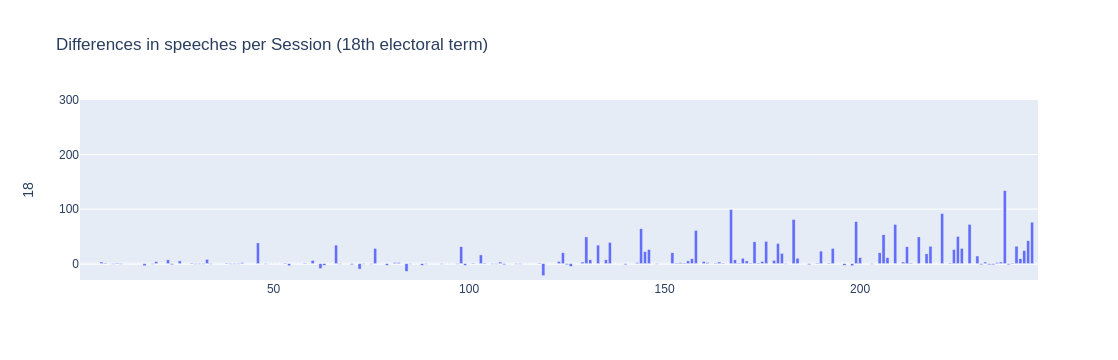

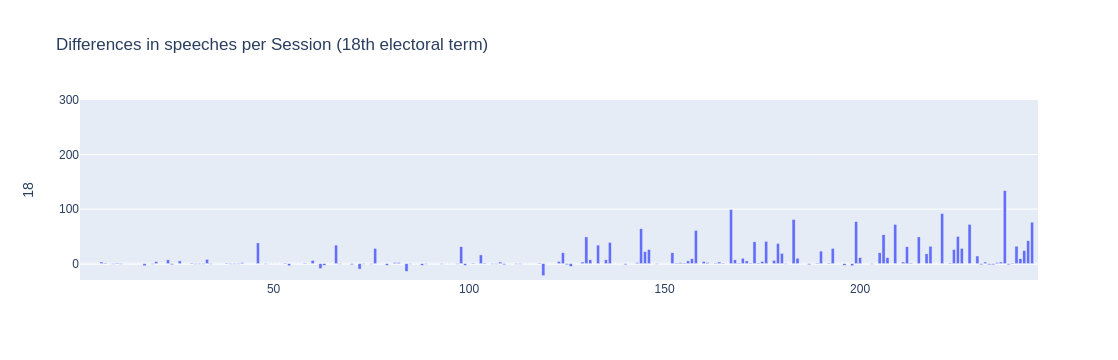

In [21]:
fig = px.bar(diff, x=diff.index, y="18", title='Differences in speeches per Session (18th electoral term)', range_y=[-30,300],
            labels={
                     "session": "",
                     "19": ""})
fig.show()
fig.show()

In [ ]:
diff["18"].describe()

## Session 18 237 (Diff 134) due to GermaParl coding Anhang Erklärungen nach § 31 GO

In [ ]:
sess = 237
dfoo = dfo[dfo["electoral_term"] == 18]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"].str[:40]
dfgg = dfg[dfg["electoral_term"] == 18]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"].str[:40]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no", "description_agenda", "speech_id"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

In [ ]:
fil = pd.concat([dfoo.value_counts("name"), dfgg.value_counts("name"), dfoo.value_counts("name") - dfgg.value_counts("name")], axis=1)[0].isna()
names = pd.concat([dfoo.value_counts("name"), dfgg.value_counts("name"), dfoo.value_counts("name") - dfgg.value_counts("name")], axis=1)[fil].index
dfgg[dfgg["name"].isin(names.tolist()) & ~(dfgg["name"].str.contains("Noll"))].value_counts("description_agenda")

In [ ]:
# the difference comes from the Anhang which is mistakenly labelled (Tagesordnungspunkt 9)
dfgg[(dfgg.index >= 127376) & (dfgg.index <= 127509)].shape

## Term 18 Session 46 (Diff 38) (GermaParl includes Erklärungen nach § 31 GO)

In [26]:
term, sess = 18, 46
dfoo = dfo[dfo["electoral_term"] == term]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"].str[:40]
dfgg = dfg[dfg["electoral_term"] == term]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"].str[:40]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no", "description_agenda", "speech_id"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

426 388 Difference: 38


In [27]:
diffs = pd.concat([dfoo.value_counts("name"), dfgg.value_counts("name"), dfoo.value_counts("name") - dfgg.value_counts("name")], axis=1)

In [34]:
diffs = diffs[diffs.iloc[:,2] != 0.0]
diffs[diffs.iloc[:,2].isna()]

,count,count,count
name,,,
Not found,7.0,NaN,NaN
Philipp Lerchenfeld,1.0,NaN,NaN
Erika Steinbach-Hermann,1.0,NaN,NaN
Dorothee Mantel,1.0,NaN,NaN
Marieluise Beck-Oberdorf,1.0,NaN,NaN
Klaus Peter Schulze,1.0,NaN,NaN
Jörg Diether Dehm-Desoi,1.0,NaN,NaN
Thomas de Maizière,NaN,4.0,NaN
Veronika Bellmann,NaN,1.0,NaN


In [35]:
dfgg[dfgg["name"].str.contains("Heller")].description_agenda

84639    zur namentlichen Abstimmung über den von der Bundesregierung eingebrachten Entwu...
Name: description_agenda, dtype: object

#### Conclusion:
Difference largely stems from GermanParl mistakenly coding

"""Anlage 6
Erklärungen nach § 31 GO zur namentlichen Abstimmung über den von der Bundesregierung eingebrachten Entwurf ei-
nes Gesetzes zur Stärkung der Tarifautonomie (Tarifautonomiestärkungsgesetz) (Tagesordnungspunkt 4 a)"""

as speeches

## Other Session also include Erklärungen nach § 31 GO:

18, 193

## Term 18 Session 119, (Diff -22) Problem of GermaParl not able to handle large paragraphs

See https://github.com/PolMine/GermaParl2/issues/6

In [18]:
## Example of Germanparl 22 less speeches
dfoo = dfo[dfo["electoral_term"] == 18]
dfoo = dfoo[dfoo["session"] == 119]
#dfoo = dfo[dfo["date"] == datetime.date(2018, 1, 31)]
dfoo["speech_content"] = dfoo["speech_content"].str[:50]
dfgg = dfg[dfg["electoral_term"] == 18]
dfgg = dfgg[dfgg["session"] == 119]
dfgg["speech"] = dfgg["speech"].str[:]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url"]]
dfgg = dfgg[["name", "speech", "party", "date"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

102 124 Difference: -22


In [32]:
print("Speech contains call for next speaker:\n")
dfgg[dfgg["name"].str.contains("Rohde")].speech.str[-200:]

Speech contains call for next speaker:



100243    ts- und verbraucherpolitischen Themen am Ende nicht herunterfallen werden . Vielen Dank . (C) (D) (A) Vizepräsident Johannes Singhammer: Der Kollege Harald Petzold, Die Linke, spricht als Nächster .
Name: speech, dtype: object

In [17]:
diffs = pd.concat([dfgg.value_counts("name"), dfoo.value_counts("name"), dfgg.value_counts("name") - dfoo.value_counts("name")], axis=1)
diffs = diffs[(diffs[2] < 0)]
diffs

,0,1,2
name,,,
Ulla Schmidt,16.0,18.0,-2.0
Johannes Singhammer,12.0,16.0,-4.0
Petra Pau,8.0,9.0,-1.0
Norbert Lammert,7.0,9.0,-2.0
Georg Nüßlein,4.0,6.0,-2.0
Volker Ullrich,3.0,4.0,-1.0
Gesine Lötzsch,1.0,2.0,-1.0


# open discourse misformating

In [36]:
testdf = dfo[dfo["electoral_term"] == 18]
sessionlist = []
for session in range(170):
    try:
        tmp = testdf[testdf["session"] == session]
    except:
        print(session)
    if len(tmp) > 0:  
        sample = tmp.sample()
        txt = sample["speech_content"].values[0]
        for x in range(0,len(txt),300):
            if " . " in txt[x:x+299]:
                sessionlist.append(session)
                break
                
print(sessionlist)        

[119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 135, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 155, 156, 159, 161, 162, 163, 165, 166, 167, 168, 169]


# Electoral term 19

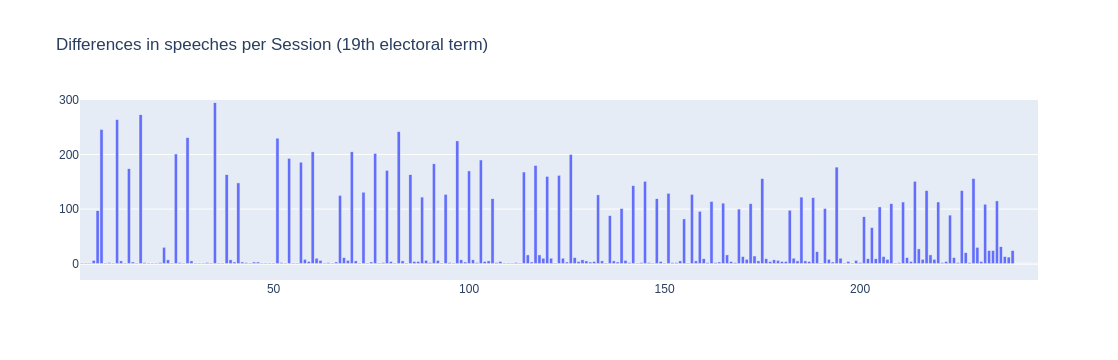

In [15]:
fig = px.bar(diff, x=diff.index, y="19", title='Differences in speeches per Session (19th electoral term)', range_y=[-30,300],
            labels={
                     "session": "",
                     "19": ""})
fig.show()

In [12]:
# Over the course of 245 speeches in the 19th legislative period, there is a mean difference of 44.5 speeches
diff["19"].describe()

count    245.000000
mean      44.587755
std       70.420382
min        0.000000
25%        2.000000
50%        5.000000
75%       89.000000
max      295.000000
Name: 19, dtype: float64

In [13]:
# Open Discourse is missing Fragestunden data

dfoo = dfo[dfo["electoral_term"] == 19]
dfgg = dfg[dfg["electoral_term"] == 19]
dfgg = dfgg[~dfgg.description_agenda.str.contains("Fragestunde")]
x = dfgg.value_counts("session", sort=False)
y = dfoo.value_counts("session", sort=False)
x19 = x-y

fig = px.bar(x19, title='Differences', range_y=[-30,100])


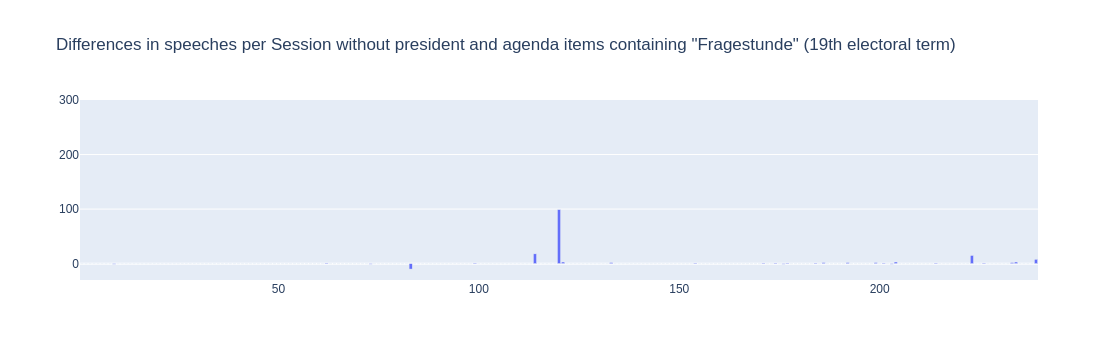

In [20]:
# ignore president remarks
import plotly.express as px
dfoo = dfo[dfo["electoral_term"] == 19]
dfgg = dfg[dfg["electoral_term"] == 19]
dfoo = dfoo[dfoo["position_short"] != "Presidium of Parliament"]
dfgg = dfgg[dfgg["role"] != "presidency"]
dfgg = dfgg[~dfgg.description_agenda.str.contains("Fragestunde")]
x = dfgg.value_counts("session", sort=False)
y = dfoo.value_counts("session", sort=False)
x19 = x-y
#fig = px.bar(diff, x=diff.index, y="19", title='Differences in speeches per Session (19th electoral term)', range_y=[-30,300],

fig = px.bar(x19, title='Differences in speeches per Session without president and agenda items containing "Fragestunde" (19th electoral term)', range_y=[-30,300], labels={"value": "", "session": ""})
fig.update(layout_showlegend=False)
fig.show()

In [ ]:
# 19;19 -> 1 difference schäuble erste rede missing, small difference

## Term 19, Session 83, (Difference -10 if excluding Fragestunde because GO-discussion regarding Fragestunde gets excluded as well

In [74]:
# Note: excluding president speeches and Fragestunden
dfoo = dfo[dfo["position_short"] != "Presidium of Parliament"]
dfgg = dfg[dfg["role"] != "presidency"]
dfgg = dfgg[~dfgg.description_agenda.str.contains("Fragestunde")]
term, sess = 19, 83
dfoo = dfoo[dfoo["electoral_term"] == term]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"].str[:100]
dfgg = dfgg[dfgg["electoral_term"] == term]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"].str[:100]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url", "last_name"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no",  "speech_id", "role", "last_name"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

223 233 Difference: -10


In [75]:
diffs = pd.concat([dfgg.value_counts("last_name"), dfoo.value_counts("last_name"), dfgg.value_counts("last_name") - dfoo.value_counts("last_name")], axis=1)
diffs = diffs[diffs[2] < 0]
diffs

,0,1,2
last_name,,,
Frieser,5.0,7.0,-2.0
Haßelmann,4.0,5.0,-1.0
Müller,3.0,5.0,-2.0
Schneider,1.0,2.0,-1.0
Buschmann,1.0,2.0,-1.0


In [50]:
dfoo[dfoo.name.str.contains("Sensburg")]

,name,speech_content,faction_id,date,document_url
81886,Patrick Sensburg,\n\nSehr geehrte Frau Präsidentin! Liebe Kolleginnen und Kollegen! Meine Damen und Herren! Die Regier,4,2019-02-21,https://dip21.bundestag.de/dip21/btp/19/19083.pdf
81887,Patrick Sensburg,"\n\nDas mache ich jetzt. – Ich wünsche mir, dass wir dies gemeinsam beschließen und einen Schritt wei",4,2019-02-21,https://dip21.bundestag.de/dip21/btp/19/19083.pdf


GO discussion regarding Fragestunde was excluded here above in ′dfgg[~dfgg.description_agenda.str.contains("Fragestunde")]′ Its normally included so GermanParl is not actually missing data

agenda_description: a) Beschlussempfehlung und Bericht des Ausschusses für Wahlprüfung, Immunität und Geschäftsordnung: Änderung der Geschäftsordnung des Deutschen Bundestages hier: Anlagen 4 und 7 zur GO-BT (Fragestunde und Regierungsbefragung)  Drucksache 19/7859

## Session 19 223 (Diff 89), Open Discourse doesn't include Fragestunde and GO discussion

In [22]:
sess = 223
dfoo = dfo[dfo["electoral_term"] == 19]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"].str[:40]
dfgg = dfg[dfg["electoral_term"] == 19]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"].str[:40]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no", "description_agenda", "speech_id"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

442 353 Difference: 89


In [23]:
# Fragestunde missing
dfgg = dfgg[~dfgg.description_agenda.str.contains("Fragestunde")]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

392 353 Difference: 39


In [24]:
# Speeches discussion the Geschäftsordnung before Tagesordnungspunkt 1 are included in GermanParl but not Open Discourse
dfgg = dfgg[dfgg.index > 69023]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

363 353 Difference: 10


In [25]:
diffs = pd.concat([dfoo.value_counts("name"), dfgg.value_counts("name"), dfoo.value_counts("name") - dfgg.value_counts("name")], axis=1)
#diffs[diffs[2] != 0.0]

In [26]:
diffs = diffs[(diffs[2] != 0.0) & (diffs[2] != -1.0)]
diffs = diffs[~(diffs.index.str.contains("Friedrich")) & ~(diffs.index.str.contains("Dagmar"))]
names = diffs.index.to_list()

In [27]:
pd.DataFrame(dfgg[dfgg["name"].isin(names)].value_counts("description_agenda"))

,0
description_agenda,
Befragung der Bundesregierung,5
a) – Zweite und dritte Beratung des von den Fraktionen der CDU/CSU und SPD eingebrachten Entwurfs eines Vierten Gesetzes zum Schutz der Bevölkerung bei einer epidemischen Lage von nationaler Tragweite,3
– Beschlussempfehlung und Bericht des Auswärtigen Ausschusses zu dem Antrag der Bundesregierung: Fortsetzung der Beteiligung bewaffneter deutscher Streitkräfte an der durch die Europäische Union geführten EU NAVFOR Somalia Operation Atalanta,2
"Antrag der Abgeordneten Caren Lay, Pascal Meiser, Dr. Gesine Lötzsch, weiterer Abgeordneter und der Fraktion DIE LINKE: Bundesweiten Mietendeckel einführen",1
Vereinbarte Debatte: Suizidhilfe,1


## Term 19  Session 114 (Missing: 80, 18 w/o presidents) -> Open Discourse Some remarks are missing ind the Befragung of the Bundesregierung

In [115]:
term, sess = 19, 114
dfoo = dfo[dfo["electoral_term"] == term]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"]
dfgg = dfg[dfg["electoral_term"] == term]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url", "position_short"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no",  "speech_id", "role", "description_agenda"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

262 94 Difference: 168


In [116]:
# Fragestunde missing
dfgg = dfgg[~dfgg.description_agenda.str.contains("Fragestunde")]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

173 94 Difference: 79


In [117]:
dfoo.value_counts("position_short")

position_short
Member of Parliament       53
Minister                   37
Presidium of Parliament    4 
dtype: int64

In [118]:
dfgg.value_counts("role")

role
mp            66
presidency    65
government    42
dtype: int64

**Almost all remarks by the president seem to be missing in the Befragung of the Bundesregierung**

In [119]:
dfoo[dfoo.name.str.contains("Träger")].speech_content

86014    \n\nVielen Dank für das Wort. – Sehr geehrter Herr Minister, wir sprechen gerade über den Zertifikatehandel. Der hat in der öffentlichen Reaktion große Diskussionen hervorgerufen. Meine Nachfrage bezieht sich darauf: Warum ist die Entscheidung in dieser Richtung gefallen? Uns Sozialdemokraten ist natürlich vor allem die soziale Ausgewogenheit wichtig. Wie ist das bei diesem System abgesichert?
Name: speech_content, dtype: object

In [120]:
dfgg[dfgg.name.str.contains("Träger")].speech

33776    Herr Präsident, ich nehme die Entschuldigung sehr gern an.                                                                                                                                                                                                                                                                                                                                                 
33778    Vielen Dank für das Wort. – Sehr geehrter Herr Minister, wir sprechen gerade über den Zertifikatehandel. Der hat in der öffentlichen Reaktion große Diskussionen hervorgerufen. Meine Nachfrage bezieht sich darauf: Warum ist die Entscheidung in dieser Richtung gefallen? Uns Sozialdemokraten ist natürlich vor allem die soziale Ausgewogenheit wichtig. Wie ist das bei diesem System abgesichert?
Name: speech, dtype: object

In [112]:
dfgg.value_counts("description_agenda")

description_agenda
Befragung der Bundesregierung                                                                                                     139
Aktuelle Stunde auf Verlangen der Fraktion BÜNDNIS 90/DIE GRÜNEN: Haltung der Bundesregierung zur Eskalation in der Golfregion    34 
dtype: int64

## Term 19 Session 120 (Diff 160) (still includes Fragestunde (coded as unknown))

In [28]:
sess = 120
dfoo = dfo[dfo["electoral_term"] == 19]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"].str[:40]
dfgg = dfg[dfg["electoral_term"] == 19]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"].str[:40]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no", "description_agenda", "speech_id"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

341 181 Difference: 160


In [29]:
dfgg.agenda_no.unique()

array(['1', 'U1', 'Z1'], dtype=object)

In [30]:
dfgg.description_agenda.value_counts()

Unknown                                                                                            156
Befragung der Bundesregierung                                                                      143
Aktuelle Stunde auf Verlangen der Fraktion der FDP: Meinungsfreiheit in Deutschland verteidigen    42 
Name: description_agenda, dtype: int64

In [31]:
## Difference comes from Fragestunde being coded as Unknown

## Term 19 Sess 4 (Diff 6) (Open discurse missing Ergebnis der Namentlichen Abstimmung announced by president)

In [198]:
term, sess = 19, 4
dfoo = dfo[dfo["electoral_term"] == term]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"].str[:100]
dfgg = dfg[dfg["electoral_term"] == term]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"].str[:100]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no",  "speech_id", "role"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

331 325 Difference: 6


In [199]:
diffs = pd.concat([dfgg.value_counts("name"), dfoo.value_counts("name"), dfgg.value_counts("name") - dfoo.value_counts("name")], axis=1)
diffs = diffs[diffs[2] >= 3.0]
diffs

,0,1,2
name,,,
Claudia Roth,30.0,27.0,3.0
Wolfgang Schäuble,27.0,24.0,3.0


In [200]:
# Identify missing speeches
dfdiffg = dfgg[(dfgg["name"].str.contains("Roth")) | (dfgg["name"].str.contains("Schäuble"))] 
dfdiffo = dfoo[(dfoo["name"].str.contains("Roth")) | (dfoo["name"].str.contains("Schäuble"))]
starting = tuple(dfdiffo.speech_content.str.lstrip().str[:30].to_list())
dfdiff = dfdiffg[~dfdiffg["speech"].str.startswith(starting)]
dfdiff

,name,speech,party,date,agenda_no,speech_id,role
426,Wolfgang Schäuble,"Guten Morgen, liebe Kolleginnen und Kollegen! Die Sitzung ist eröffnet. Bevor wir in die Tagesordnu",CDU,2017-12-12,1,426,presidency
452,Wolfgang Schäuble,Jetzt gebe ich das von den Schriftführerinnen und Schriftführern ermittelte Ergebnis der namentlic,CDU,2017-12-12,2,452,presidency
477,Wolfgang Schäuble,Jetzt gebe ich das von den Schriftführerinnen und Schriftführern ermittelte Ergebnis der namentlic,CDU,2017-12-12,2,477,presidency
491,Claudia Roth,"Vielen Dank, Niels Annen. Bevor ich den nächsten Redner aufrufe, möchte ich Ihnen das von den Schr",GRUENE,2017-12-12,4,491,presidency
518,Claudia Roth,"Vielen Dank, Jürgen Hardt. – Bevor ich den nächsten Redner aufrufe, gebe ich Ihnen das von den Sch",GRUENE,2017-12-12,5,518,presidency
538,Claudia Roth,"Vielen Dank, Jürgen Hardt. – Bevor ich den nächsten Redner aufrufe, möchte ich Ihnen das von den",GRUENE,2017-12-12,Z1,538,presidency


In [191]:
# Open discourse doesn't include Ergebnis der Namentlichen Abstimmung

## Term 19 Sess 189 (Diff 22) Some president's remarks missing in Open Discourse

In [181]:
term, sess = 19, 189
dfoo = dfo[dfo["electoral_term"] == term]
dfoo = dfoo[dfoo["session"] == sess]
dfoo["speech_content"] = dfoo["speech_content"].str[:100]
dfgg = dfg[dfg["electoral_term"] == term]
dfgg = dfgg[dfgg["session"] == sess]
dfgg["speech"] = dfgg["speech"].str[:100]
dfoo = dfoo[["name", "speech_content", "faction_id", "date", "document_url"]]
dfgg = dfgg[["name", "speech", "party", "date", "agenda_no",  "speech_id", "role"]]
print(len(dfgg), len(dfoo), "Difference:", len(dfgg)-len(dfoo))

402 380 Difference: 22


In [182]:
diffs = pd.concat([dfgg.value_counts("name"), dfoo.value_counts("name"), dfgg.value_counts("name") - dfoo.value_counts("name")], axis=1)
diffs = diffs[(diffs[2] >= 1.0)]
diffs

,0,1,2
name,,,
Claudia Roth,58.0,51.0,7.0
Wolfgang Kubicki,40.0,36.0,4.0
Wolfgang Schäuble,22.0,19.0,3.0


In [183]:
# Identify missing speeches
dfdiffg = dfgg[(dfgg["name"].str.contains("Roth")) | (dfgg["name"].str.contains("Schäuble")) | (dfgg["name"].str.contains("Kubicki")) | (dfgg["name"].str.contains("Friedrich"))] 
dfdiffo = dfoo[(dfoo["name"].str.contains("Roth")) | (dfoo["name"].str.contains("Schäuble")) | (dfoo["name"].str.contains("Kubicki")) | (dfoo["name"].str.contains("Friedrich"))]
starting = tuple(dfdiffo.speech_content.str.lstrip().str[:30].to_list())
dfdiff = dfdiffg[~dfdiffg["speech"].str.startswith(starting)]
dfdiff

,name,speech,party,date,agenda_no,speech_id,role
57677,Wolfgang Schäuble,"Guten Morgen, liebe Kolleginnen und Kollegen! Bitte nehmen Sie Platz. Die Sitzung ist eröffnet. Vor",CDU,2020-11-05,8,57677,presidency
57707,Wolfgang Schäuble,Damit schließe ich die Aussprache. Die unterschiedlichen Voten der Fraktionen sind innerhalb der Enq,CDU,2020-11-05,8,57707,presidency
57741,Claudia Roth,"Danke schön. – Vielen Dank, Frau Kollegin Leidig. Entschuldigen Sie, wenn wir drei hier oben sehr v",GRUENE,2020-11-05,10,57741,presidency
57747,Claudia Roth,"Vielen Dank, Andreas Scheuer. So, liebe Kolleginnen und Kollegen, jetzt darf ich noch mal fragen: Gi",GRUENE,2020-11-05,10,57747,presidency
57763,Claudia Roth,"Vielen Dank, Michael Donth. – Damit schließe ich die Aussprache. Bevor wir zur Abstimmung kommen, mo",GRUENE,2020-11-05,10,57763,presidency
57830,Hans-Peter Friedrich,"Vielen Dank, Herr Kollege. – Die Aktuelle Stunde ist damit beendet. Wir kommen zum nächsten Tagesor",CSU,2020-11-05,Z4,57830,presidency
57848,Hans-Peter Friedrich,"Vielen Dank, Kollege Sepp Müller. – Ich beende die Aussprache zu Tagesordnungspunkt 13. Wir kommen",CSU,2020-11-05,13,57848,presidency
57882,Claudia Roth,"Vielen Dank, Dr. Volker Ullrich. – Damit schließe ich die Aussprache. Interfraktionell wird Überwei",GRUENE,2020-11-05,14,57882,presidency
57908,Claudia Roth,"Vielen Dank, auch für den Sprachunterricht, der mir als Süddeutsche bei Ihnen immer besonders gefa",GRUENE,2020-11-05,15,57908,presidency
57914,Claudia Roth,Der Redner kommt aus Bayern.,GRUENE,2020-11-05,5,57914,presidency
